In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
df=pd.read_csv("train 2.csv")
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Basic Understanding of data

In [5]:
df.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


# Data cleaning includes:
### -- missing value handling
### -- Removing irrelevant features

In [7]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [8]:
# As you can see there are no null values

In [9]:
# Removing irrelavant columns
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
# Here id, CustomerId, Surname there are irrevelant columns and cannot be used for creating a predictive model

In [11]:
df.drop(["id","CustomerId", "Surname"],axis=1,inplace=True)

In [12]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Data Transformation / Engineering includes:
### -- Doing necessary encoding on categorical features
### -- Dealing with skewed data as well outliers
### -- Feature engineering if required (It means combining two or more features for better model performance)

In [13]:
# First we will do encoding on categorical variables
# list of categorical variables : Geography, Gender, HasCrCard, IsActiveMember

In [14]:
df["Geography"].value_counts()
# it contains more than two categories hence we do one-hot encoding

France     94215
Spain      36213
Germany    34606
Name: Geography, dtype: int64

In [15]:
df["Gender"].value_counts()
# It contains only two categories hence we do binary encoding

Male      93150
Female    71884
Name: Gender, dtype: int64

In [16]:
df["HasCrCard"].value_counts()
# It is already encoded

1.0    124428
0.0     40606
Name: HasCrCard, dtype: int64

In [17]:
df["IsActiveMember"].value_counts()
# It is already encoded

0.0    82885
1.0    82149
Name: IsActiveMember, dtype: int64

#### Encoding of categorical variables

In [18]:
# one hot encoding for Geography
df=pd.get_dummies(df,columns=["Geography"])
# Binary encoding for gender
df["Gender"].replace({"Male":1, "Female":0},inplace=True)

In [19]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1


#### Now let's find among these categorical variables which are relevant:

### To do that When dependent and independent both variables are categorical then we use chi_square
### Hypothesis:
### Null hypothesis (H0): There is no relationship between the independent and dependent variables.
### Alternative hypothesis (Ha): There is a relationship between the independent and dependent variables.
### and here LOS (alpha) is 0.05

### If p_value <= alpha then we reject null hypo
### if p_value > alpha then we do not reject nyll hypo

In [20]:
# Now let's find among these categorical variables which are relevant
# To do that When dependent and independent both variables are categorical then we use chi_square
# here hypothesis is

In [21]:
import pandas as pd
from scipy.stats import chi2_contingency
def perform_chi_square_test(df, dependent_var, independent_vars):
    """
    Performs Chi-Square tests for a list of independent categorical variables against a single dependent variable
    """
    results = []

    for independent_var in independent_vars:
        # Create a contingency table
        contingency_table = pd.crosstab(df[independent_var], df[dependent_var])

        # Perform the chi-square test
        chi2, p, dof, expected = chi2_contingency(contingency_table)

        # Append the result
        results.append((independent_var, p))

    # Convert the results into a DataFrame
    result_df = pd.DataFrame(results, columns=['Categorical Feature', 'P-Value'])

    # Return the DataFrame
    return result_df

In [22]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [23]:
independent_cat_vars=["Gender","HasCrCard","IsActiveMember","Geography_France","Geography_Germany","Geography_Spain"]
dependent_var="Exited"

In [24]:
p_value_table=perform_chi_square_test(df,dependent_var,independent_cat_vars)

In [25]:
p_value_table

,Categorical Feature,P-Value
0,Gender,0.000000e+00
1,HasCrCard,2.522693e-19
2,IsActiveMember,0.000000e+00
3,Geography_France,0.000000e+00
4,Geography_Germany,0.000000e+00
5,Geography_Spain,6.257274e-96


In [26]:
# title Default title text
# as you can see here p_value of all categorical variable is less than alpha (0.5)
# hence we reject null hyothesis and conclude that:
# There is a relationship between the independent and dependent variables.


In [27]:
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [28]:
# Now we will deal with numerical variables: CreditScore, Age, Tenure, Balance, NumOfProducts, EstimatedSalary

### Before doing data transformation on thes numerical variable we will find which num_variables are relevant
### As you we know that if dependent variable is categorical and independent variable is numerical then we perform **ANOVA**

### Hypothesis:
### Null hypo: Independent
### Alternative hypo: Dependent
### if p_value <= alpha, we reject null hypo

In [29]:
import pandas as pd
from scipy.stats import f_oneway

def perform_anova_test(df, dependent_var, independent_vars):
    """
    Performs ANOVA tests for a list of independent numerical variables against a single dependent categorical variable.
    """
    results = []  # To store the result as a list of tuples (variable_name, p_value)

    # Unique categories in the dependent variable
    categories = df[dependent_var].unique()

    for independent_var in independent_vars:
        # Group data by dependent variable and collect the independent variable values for each group
        group_data = [df[df[dependent_var] == category][independent_var] for category in categories]

        # Perform the ANOVA test
        f_stat, p_value = f_oneway(*group_data)

        # Append the result
        results.append((independent_var, p_value))

    # Convert the results into a DataFrame
    result_df = pd.DataFrame(results, columns=['Numerical Feature', 'P-Value'])

    return result_df


In [30]:
indepedent_num_vars=["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]

In [31]:
p_value=perform_anova_test(df,"Exited",indepedent_num_vars)

In [32]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1


In [33]:
p_value

,Numerical Feature,P-Value
0,CreditScore,9.373557e-29
1,Age,0.000000e+00
2,Tenure,1.883318e-15
3,Balance,0.000000e+00
4,NumOfProducts,0.000000e+00
5,EstimatedSalary,2.027177e-14


In [34]:
# As you can see all numerical features have p_value less than alpha hence we reject null hypo
# i.e they all are relevant

In [35]:
# Now we will check the skewness of all numerical indepedent variables

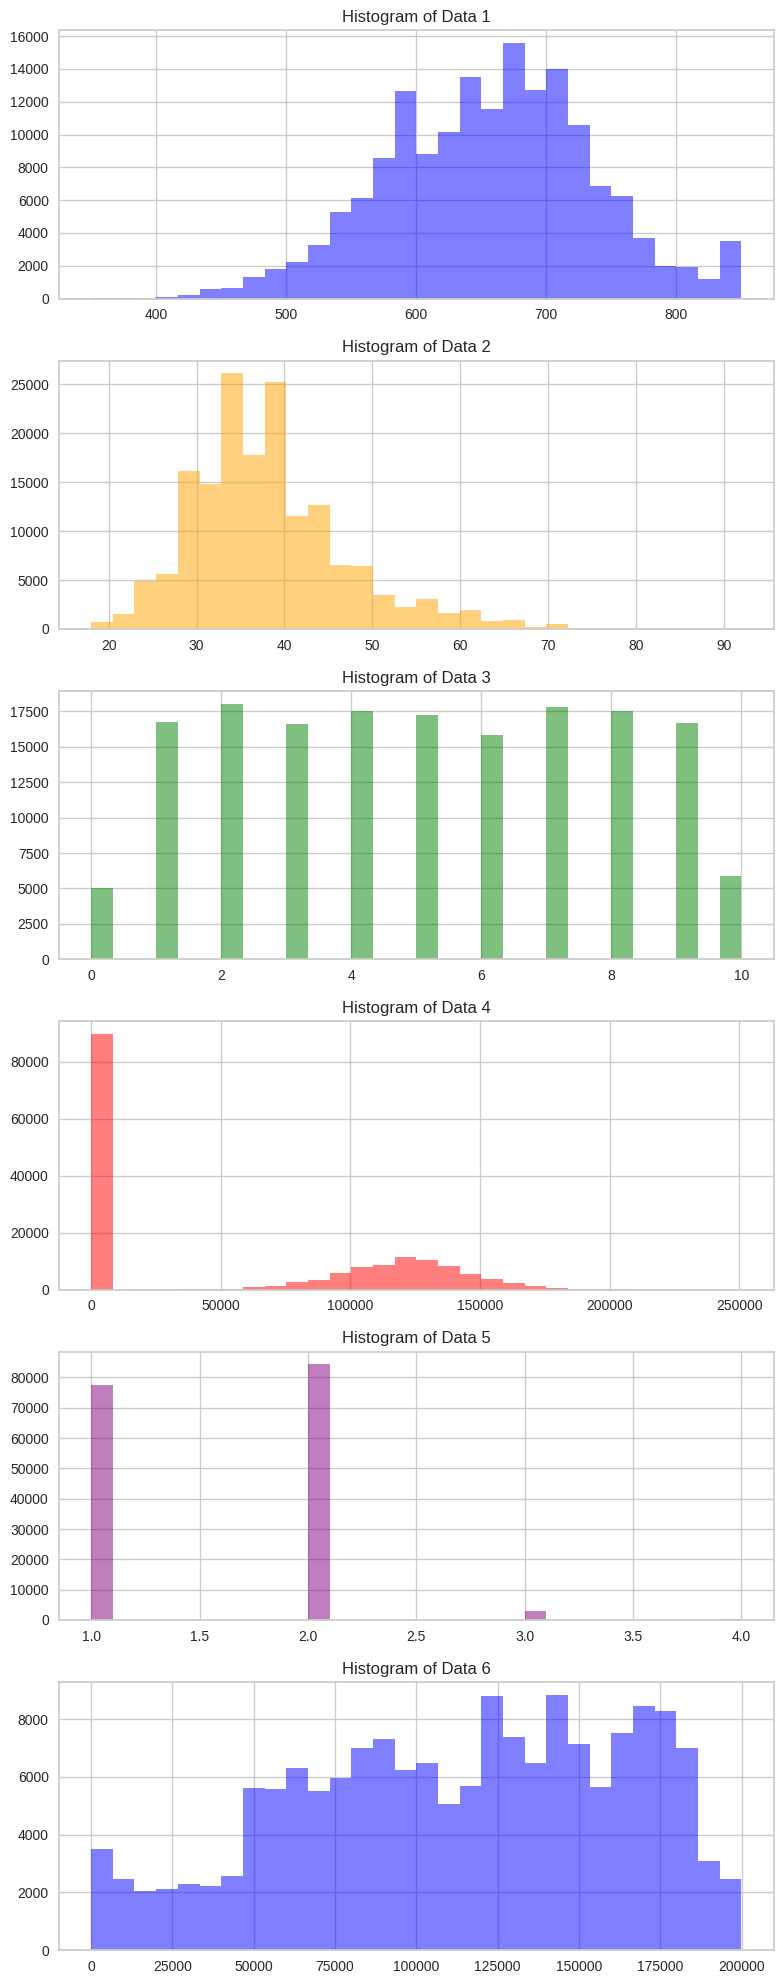

In [36]:
# Plot histograms
fig, axs = plt.subplots(6, 1, figsize=(8, 20))

# Plot histograms for each variable
axs[0].hist(df["CreditScore"], bins=30, alpha=0.5, color='blue')
axs[0].set_title('Histogram of Data 1')

axs[1].hist(df["Age"], bins=30, alpha=0.5, color='orange')
axs[1].set_title('Histogram of Data 2')

axs[2].hist(df["Tenure"], bins=30, alpha=0.5, color='green')
axs[2].set_title('Histogram of Data 3')

axs[3].hist(df["Balance"], bins=30, alpha=0.5, color='red')
axs[3].set_title('Histogram of Data 4')

axs[4].hist(df["NumOfProducts"], bins=30, alpha=0.5, color='purple')
axs[4].set_title('Histogram of Data 5')

axs[5].hist(df["EstimatedSalary"], bins=30, alpha=0.5, color='blue')
axs[5].set_title('Histogram of Data 6')
# Adjust layout
plt.tight_layout()

plt.show()

# Here individual data transformation might be suitable because before creating a model we are going to do scaling (StandardSacling) that will fix this skewness issue

In [37]:
# We check for outliers

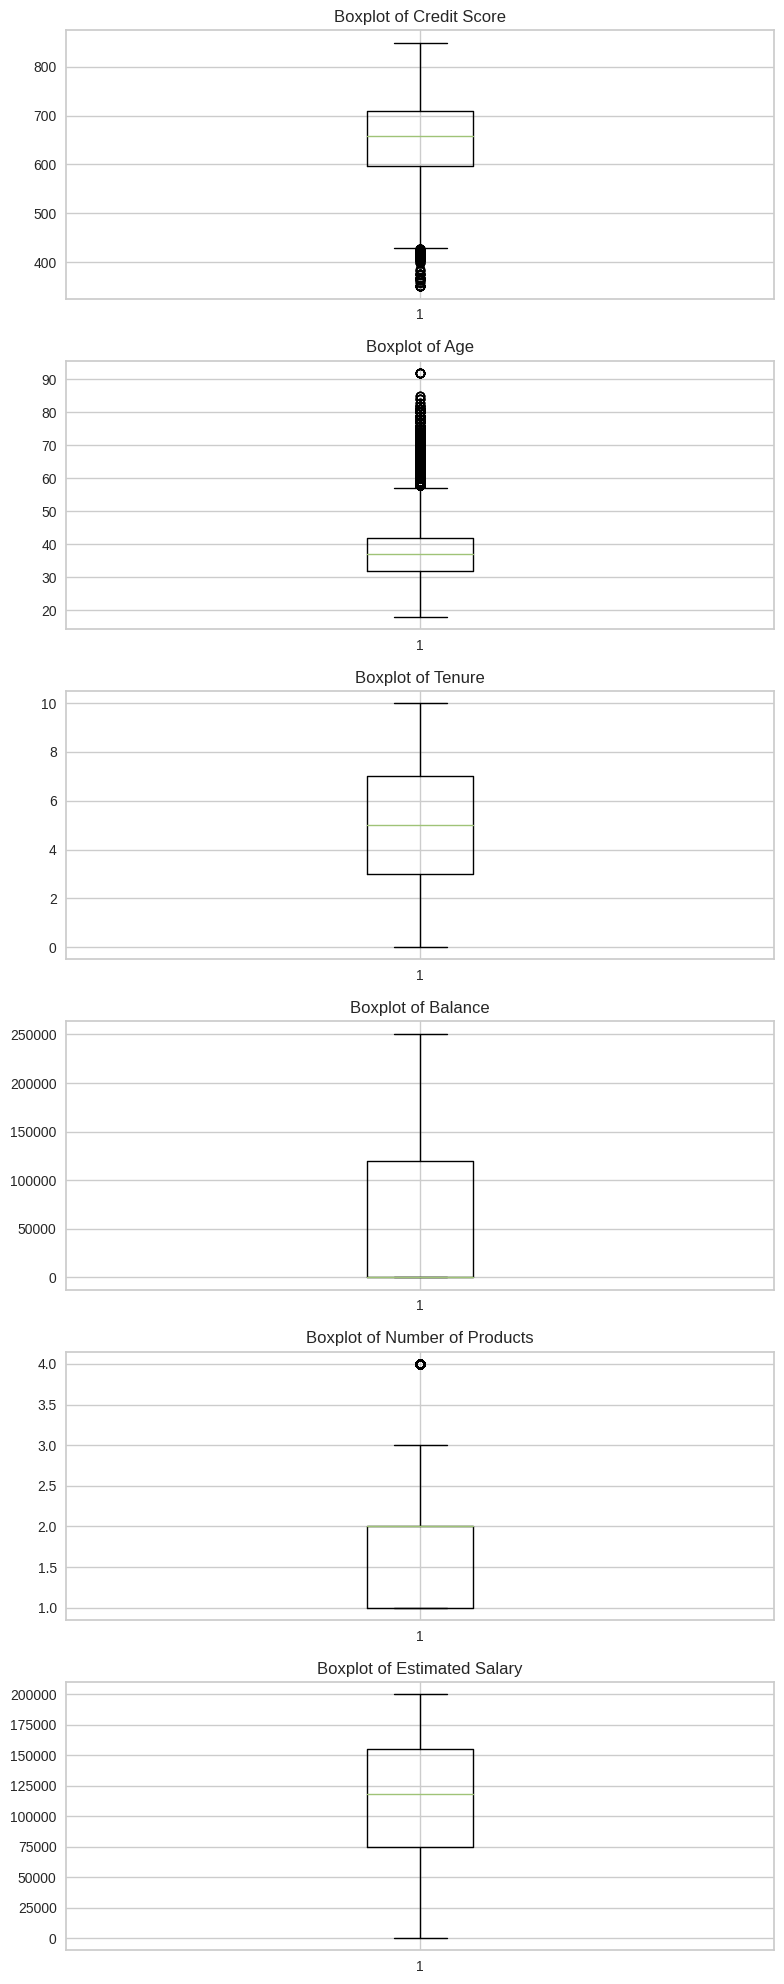

In [38]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(6, 1, figsize=(8, 20))

# Plot boxplots for each variable
axs[0].boxplot(df["CreditScore"])
axs[0].set_title('Boxplot of Credit Score')

axs[1].boxplot(df["Age"])
axs[1].set_title('Boxplot of Age')

axs[2].boxplot(df["Tenure"])
axs[2].set_title('Boxplot of Tenure')

axs[3].boxplot(df["Balance"])
axs[3].set_title('Boxplot of Balance')

axs[4].boxplot(df["NumOfProducts"])
axs[4].set_title('Boxplot of Number of Products')

axs[5].boxplot(df["EstimatedSalary"])
axs[5].set_title('Boxplot of Estimated Salary')

# Adjust layout
plt.tight_layout()

plt.show()


In [39]:
import pandas as pd

def remove_outliers(df, column_name):
    """
    Remove outliers from a dataset based on a specific column using the Interquartile Range (IQR) method.

    arguments are dataframe and column name for which outliers are to be removed
    """
    data = df[column_name]
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    cleaned_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return cleaned_df

In [40]:
# outliers in creditscore variable

In [41]:
# First run to remove outliers
cleaned_data=remove_outliers(df,"CreditScore")


In [42]:
cleaned_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb164cefdf0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb164cec1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb164cefdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb164cec850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb164cec880>],
 'means': []}

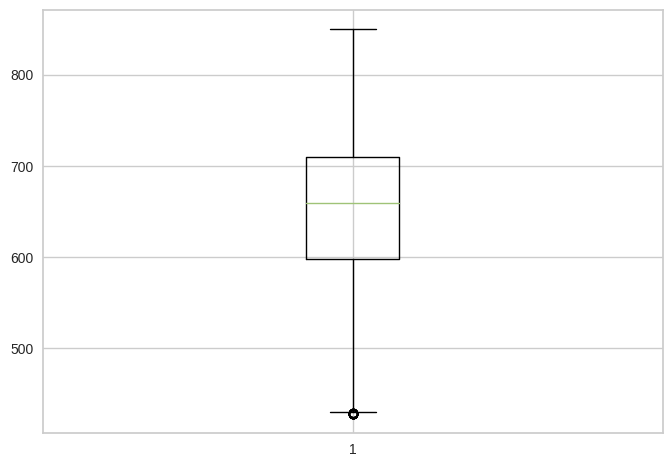

In [43]:
# Again checking for outliers for same variable
plt.boxplot(cleaned_data["CreditScore"])

In [44]:
# there are still some outliers
# second run to remove outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb164d7d870>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb164d7d4e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb164d7e890>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb164d7fee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb164d7e8f0>],
 'means': []}

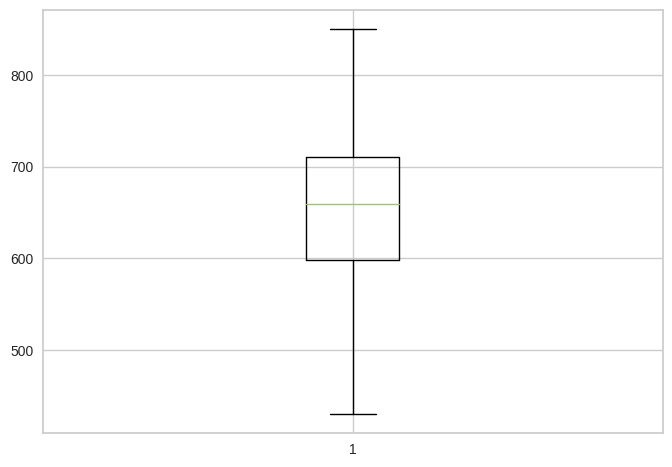

In [45]:
cleaned_data=remove_outliers(cleaned_data,"CreditScore")
plt.boxplot(cleaned_data["CreditScore"])

In [46]:
# as you can see all outliers are removed

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb164abb310>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb164ab81f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb164ab9600>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb164ab90c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb164ab8190>],
 'means': []}

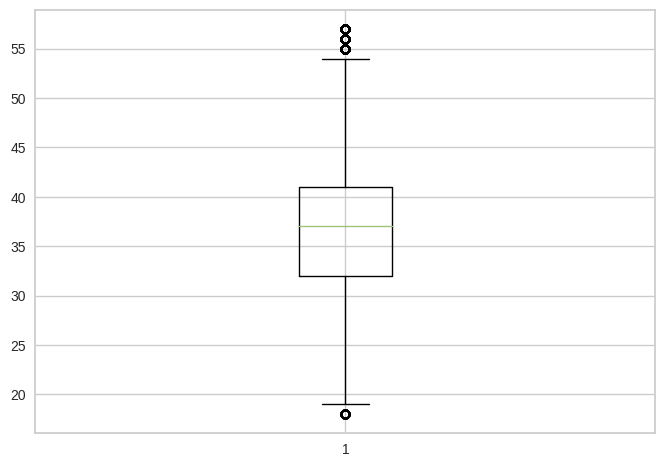

In [47]:
# Next variable: Age
# First run
cleaned_data=remove_outliers(cleaned_data,"Age")
plt.boxplot(cleaned_data["Age"])

In [48]:
# Again there are some outliers hence second run

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb164ca7ee0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb164ca4070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb164ca7880>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb164ca46a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb164ca4ac0>],
 'means': []}

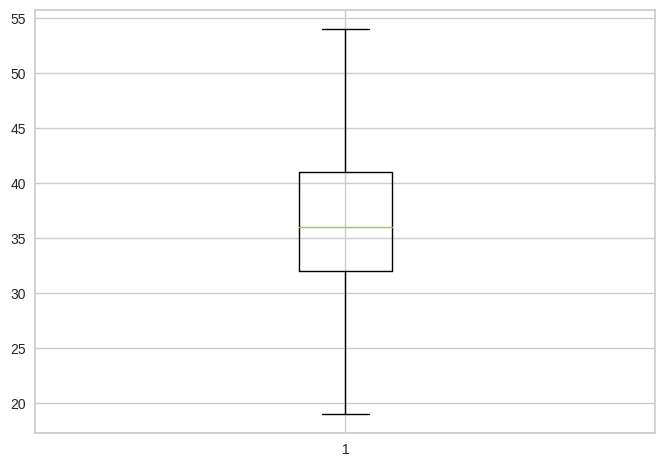

In [49]:
# Second run
cleaned_data=remove_outliers(cleaned_data,"Age")
plt.boxplot(cleaned_data["Age"])

In [50]:
# Next variable number of products
cleaned_data=remove_outliers(cleaned_data,"NumOfProducts")

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb164e10520>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb164e12f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb164e125f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb164e13580>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb164e135b0>],
 'means': []}

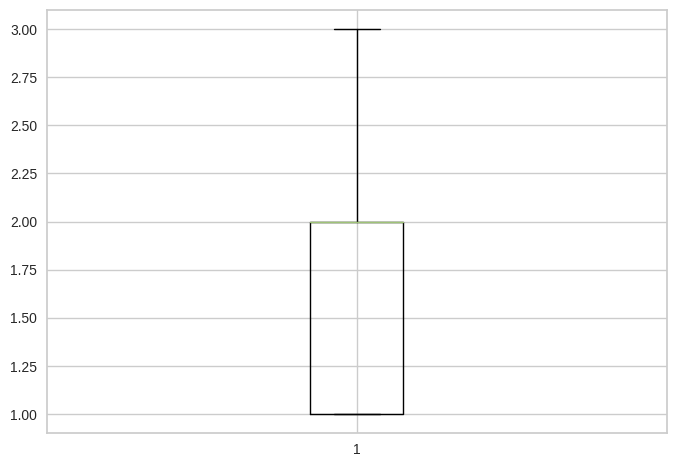

In [51]:
plt.boxplot(cleaned_data["NumOfProducts"])

### From all variables outliers are removed

In [52]:
cleaned_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,668,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,1,0,0
1,627,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,1,0,0
2,678,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,1,0,0
3,581,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,1,0,0
4,716,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,667,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0,0,1
165030,792,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,1,0,0
165031,565,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,1,0,0
165032,554,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0,0,1


# Scaling: Scaling is very important, It helps to ML models perform in a better way.
# We only do sacling of numerical indepedent variables
# For scaling we are using StandardScaler, beacuse it uses standard normal distribution logic for scaling

In [53]:
indepedent_num_vars

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [54]:
cleaned_data[indepedent_num_vars]

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
0,668,33.0,3,0.00,2,181449.97
1,627,33.0,1,0.00,2,49503.50
2,678,40.0,10,0.00,2,184866.69
3,581,34.0,2,148882.54,1,84560.88
4,716,33.0,5,0.00,2,15068.83
...,...,...,...,...,...,...
165029,667,33.0,2,0.00,1,131834.75
165030,792,35.0,3,0.00,1,131834.45
165031,565,31.0,5,0.00,1,127429.56
165032,554,30.0,7,161533.00,1,71173.03


In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=cleaned_data[indepedent_num_vars]
scaler.fit(data)
cleaned_data[indepedent_num_vars]=scaler.transform(data)

In [56]:
cleaned_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.139429,1,-0.540450,-0.722421,-0.875872,0.844023,1.0,0.0,1.366895,0,1,0,0
1,-0.377168,1,-0.540450,-1.435796,-0.875872,0.844023,1.0,1.0,-1.261016,0,1,0,0
2,0.265428,1,0.471384,1.774389,-0.875872,0.844023,1.0,0.0,1.434944,0,1,0,0
3,-0.956765,1,-0.395902,-1.079109,1.497612,-1.047967,1.0,1.0,-0.562796,0,1,0,0
4,0.744226,1,-0.540450,-0.009047,-0.875872,0.844023,1.0,1.0,-1.946834,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.126829,0,-0.540450,-1.079109,-0.875872,-1.047967,1.0,1.0,0.378734,0,0,0,1
165030,1.701820,1,-0.251354,-0.722421,-0.875872,-1.047967,0.0,0.0,0.378728,0,1,0,0
165031,-1.158364,1,-0.829545,-0.009047,-0.875872,-1.047967,1.0,1.0,0.290998,0,1,0,0
165032,-1.296964,0,-0.974093,0.704327,1.699286,-1.047967,0.0,1.0,-0.829435,0,0,0,1


In [57]:
# Sacling is done
# Now we will check , Data is inbalanced or not

In [58]:
cleaned_data["Exited"].value_counts()

0    124661
1     30126
Name: Exited, dtype: int64

In [59]:
# As you can see count of 1 is very less in the dataset which leads to imbalanced data,
# Hence we do oversampling here

In [60]:
y=cleaned_data["Exited"]
y

0         0
1         0
2         0
3         0
4         0
         ..
165029    0
165030    0
165031    0
165032    0
165033    1
Name: Exited, Length: 154787, dtype: int64

In [61]:
del cleaned_data["Exited"]

In [62]:
x=cleaned_data
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.139429,1,-0.540450,-0.722421,-0.875872,0.844023,1.0,0.0,1.366895,1,0,0
1,-0.377168,1,-0.540450,-1.435796,-0.875872,0.844023,1.0,1.0,-1.261016,1,0,0
2,0.265428,1,0.471384,1.774389,-0.875872,0.844023,1.0,0.0,1.434944,1,0,0
3,-0.956765,1,-0.395902,-1.079109,1.497612,-1.047967,1.0,1.0,-0.562796,1,0,0
4,0.744226,1,-0.540450,-0.009047,-0.875872,0.844023,1.0,1.0,-1.946834,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
165029,0.126829,0,-0.540450,-1.079109,-0.875872,-1.047967,1.0,1.0,0.378734,0,0,1
165030,1.701820,1,-0.251354,-0.722421,-0.875872,-1.047967,0.0,0.0,0.378728,1,0,0
165031,-1.158364,1,-0.829545,-0.009047,-0.875872,-1.047967,1.0,1.0,0.290998,1,0,0
165032,-1.296964,0,-0.974093,0.704327,1.699286,-1.047967,0.0,1.0,-0.829435,0,0,1


In [63]:
from imblearn.over_sampling import SMOTE
sampler=SMOTE(sampling_strategy=0.6) # here we are keeping ratio of 60:40
x,y=sampler.fit_resample(x,y)

In [64]:
y.value_counts()

0    124661
1     74796
Name: Exited, dtype: int64

In [65]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.139429,1,-0.540450,-0.722421,-0.875872,0.844023,1.0,0.0,1.366895,1,0,0
1,-0.377168,1,-0.540450,-1.435796,-0.875872,0.844023,1.0,1.0,-1.261016,1,0,0
2,0.265428,1,0.471384,1.774389,-0.875872,0.844023,1.0,0.0,1.434944,1,0,0
3,-0.956765,1,-0.395902,-1.079109,1.497612,-1.047967,1.0,1.0,-0.562796,1,0,0
4,0.744226,1,-0.540450,-0.009047,-0.875872,0.844023,1.0,1.0,-1.946834,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199452,0.932448,0,1.115165,0.347640,1.175752,-1.047967,1.0,0.0,0.582164,0,1,0
199453,-0.941914,0,-0.978398,1.071638,-0.875872,-1.047967,1.0,1.0,-0.568827,1,0,0
199454,-0.599249,1,1.159185,0.876751,0.876074,0.844023,1.0,0.0,-0.516885,0,1,0
199455,-0.205023,1,-0.500806,0.974727,-0.875872,0.844023,1.0,1.0,-1.930507,1,0,0


In [66]:
# Just checking percentage of lower instances category
(74796/199457)*100

37.49981198955163

# Now we will start creating models, We have got final dataset that can be used to create models

## First model: stochastic gradient descent

In [67]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
s_gradient_descent=SGDClassifier(alpha=0.0001,random_state=42, max_iter=42,loss="log_loss") # here we use loss='log_loss' because we want probabilistic approach
s_gradient_descent.fit(x_train,y_train)
y_test_pred=s_gradient_descent.predict(x_test)
print("confusion_matrix:")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy:", accuracy_score(y_test,y_test_pred))

confusion_matrix:
[[31541  5776]
 [ 7789 14732]]
accuracy: 0.7733045890571209


AUC-ROC Score: 0.8278090237858196


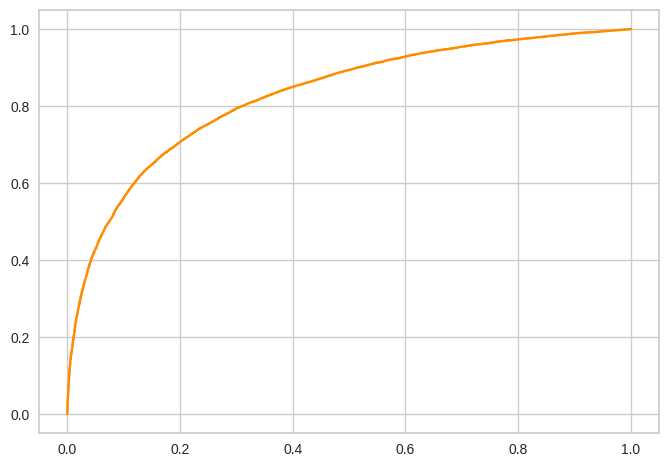

In [69]:
# To find auc_roc_curve and score
y_test_proba = s_gradient_descent.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_test_proba)
print("AUC-ROC Score:", auc_roc_score)

# Second model: Logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
logistic_model=LogisticRegression(random_state=42)
logistic_model.fit(x_train,y_train)
y_test_pred=logistic_model.predict(x_test)
print("Confusion matrix:")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy:",accuracy_score(y_test,y_test_pred))

Confusion matrix:
[[32383  4934]
 [ 8308 14213]]
accuracy: 0.7787024967412013


AUC-ROC Score: 0.82987500738875


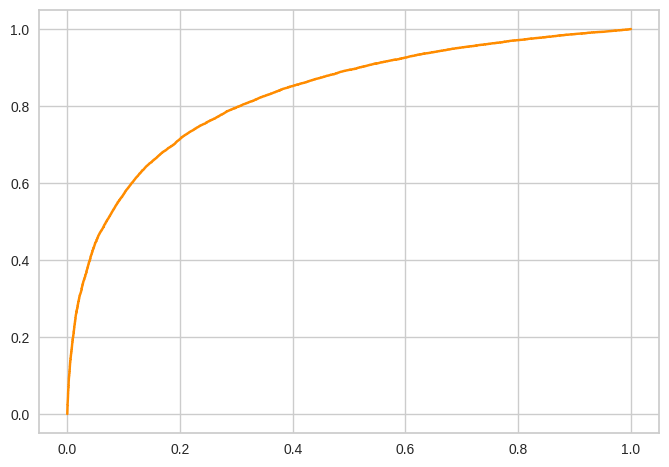

In [71]:
# To find auc_roc_curve and score
y_test_proba = logistic_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_test_proba)
print("AUC-ROC Score:", auc_roc_score)

# Third model: Decision tree model

In [72]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
decision_model=DecisionTreeClassifier(criterion="gini",random_state=42)
decision_model.fit(x_train,y_train)
y_test_pred=decision_model.predict(x_test)
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy:",accuracy_score(y_test,y_test_pred))
print("precision:",precision_score(y_test,y_test_pred))

Confusion matrix
[[31843  5474]
 [ 5002 17519]]
accuracy: 0.8249273037200441
precision: 0.7619275431653112


AUC-ROC Score: 0.8157401833482362


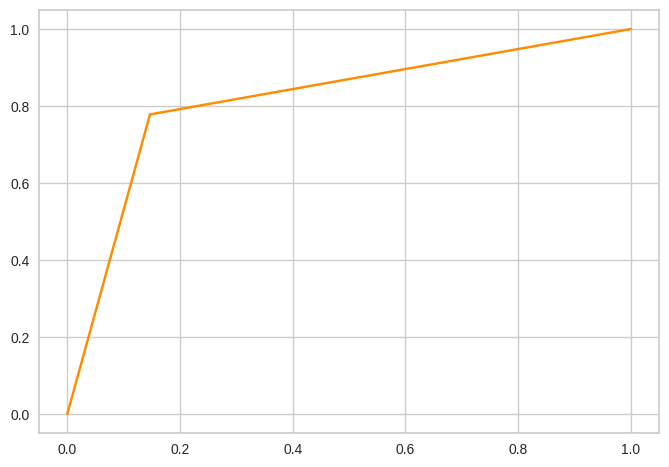

In [73]:
# To find auc_roc_curve and score
y_test_proba = decision_model.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_test_proba)
print("AUC-ROC Score:", auc_roc_score)

# Now we will use pycaret to find out which model is the best for this problem

In [74]:
from pycaret.classification import *

In [75]:
s=setup(data=df,target="Exited",session_id=123) # providing the raw data, because pycaret is a pipeline based algorithm that does everything by itself

,Description,Value
0,Session id,123
1,Target,Exited
2,Target type,Binary
3,Original data shape,"(165034, 13)"
4,Transformed data shape,"(165034, 13)"
5,Transformed train set shape,"(115523, 13)"
6,Transformed test set shape,"(49511, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [76]:
best=compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8661,0.8897,0.5580,0.7455,0.6382,0.5582,0.5670,8.2160
gbc,Gradient Boosting Classifier,0.8649,0.8890,0.5404,0.7516,0.6287,0.5488,0.5600,13.0970
xgboost,Extreme Gradient Boosting,0.8645,0.8859,0.5585,0.7373,0.6355,0.5542,0.5623,1.0640
ada,Ada Boost Classifier,0.8614,0.8813,0.5269,0.7434,0.6166,0.5350,0.5469,3.2130
rf,Random Forest Classifier,0.8593,0.8734,0.5381,0.7262,0.6181,0.5342,0.5432,16.1940
et,Extra Trees Classifier,0.8550,0.8679,0.5260,0.7135,0.6056,0.5192,0.5283,11.3570
lr,Logistic Regression,0.8349,0.8168,0.3902,0.6962,0.5001,0.4104,0.4352,7.5460
lda,Linear Discriminant Analysis,0.8336,0.8189,0.4134,0.6743,0.5125,0.4191,0.4374,0.1720
ridge,Ridge Classifier,0.8284,0.0000,0.3071,0.7227,0.4309,0.3487,0.3932,0.1120
dt,Decision Tree Classifier,0.7969,0.7034,0.5410,0.5193,0.5299,0.4004,0.4006,0.7060


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Light Gradient Boosting Machine is performing the best among all hence we use and create a model

In [77]:
x

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,0.139429,1,-0.540450,-0.722421,-0.875872,0.844023,1.0,0.0,1.366895,1,0,0
1,-0.377168,1,-0.540450,-1.435796,-0.875872,0.844023,1.0,1.0,-1.261016,1,0,0
2,0.265428,1,0.471384,1.774389,-0.875872,0.844023,1.0,0.0,1.434944,1,0,0
3,-0.956765,1,-0.395902,-1.079109,1.497612,-1.047967,1.0,1.0,-0.562796,1,0,0
4,0.744226,1,-0.540450,-0.009047,-0.875872,0.844023,1.0,1.0,-1.946834,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
199452,0.932448,0,1.115165,0.347640,1.175752,-1.047967,1.0,0.0,0.582164,0,1,0
199453,-0.941914,0,-0.978398,1.071638,-0.875872,-1.047967,1.0,1.0,-0.568827,1,0,0
199454,-0.599249,1,1.159185,0.876751,0.876074,0.844023,1.0,0.0,-0.516885,0,1,0
199455,-0.205023,1,-0.500806,0.974727,-0.875872,0.844023,1.0,1.0,-1.930507,1,0,0


In [78]:
y

0         0
1         0
2         0
3         0
4         0
         ..
199452    1
199453    1
199454    1
199455    1
199456    1
Name: Exited, Length: 199457, dtype: int64

In [80]:
from lightgbm import LGBMClassifier
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
light_gradient=LGBMClassifier(learning_rate=0.1,random_state=42)
light_gradient.fit(x_train,y_train)
y_test_pred=light_gradient.predict(x_test)
print("Confusion matrix")
print(confusion_matrix(y_test,y_test_pred))
print("accuracy:",accuracy_score(y_test,y_test_pred))
print("precision:",precision_score(y_test,y_test_pred))

[LightGBM] [Info] Number of positive: 52275, number of negative: 87344
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 139619, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374412 -> initscore=-0.513336
[LightGBM] [Info] Start training from score -0.513336
Confusion matrix
[[35049  2268]
 [ 4415 18106]]
accuracy: 0.8883151174838732
precision: 0.8886816530872681


AUC-ROC Score: 0.9479914437199474


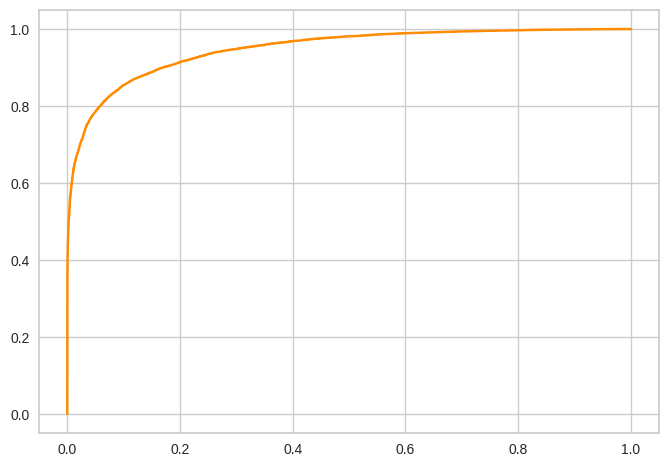

In [88]:
# To find auc_roc_curve and score
y_test_proba = light_gradient.predict_proba(x_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',label='ROC curve (area = %0.2f)' % roc_auc)

# Calculate AUC-ROC score
auc_roc_score = roc_auc_score(y_test, y_test_proba)
print("AUC-ROC Score:", auc_roc_score)

In [81]:
# First overfitting check

In [82]:
# We comnpare training accuracy and testing accuracy
print("Training accuracy:",light_gradient.score(x_train,y_train))
print("Testing accuracy:",light_gradient.score(x_test,y_test))

Training accuracy: 0.8892414356212264
Testing accuracy: 0.8883151174838732


In [83]:
# as you can see there is no huge difference in training and testing accuracy


In [84]:
# Second Overfitting check using cross validation

# Cross validation test to determine overfitting

In [87]:
from sklearn.model_selection import KFold,cross_val_score
kf=KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(light_gradient, x ,y , cv=kf, scoring='accuracy')
print("cross validation scores:",cv_scores)
print("average accuracy:",cv_scores.mean())

[LightGBM] [Info] Number of positive: 59817, number of negative: 99748
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 159565, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374875 -> initscore=-0.511357
[LightGBM] [Info] Start training from score -0.511357
[LightGBM] [Info] Number of positive: 59624, number of negative: 99941
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009044 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1798
[LightGBM] [Info] Number of data points in the train set: 159565, number of used features: 12
[LightGBM] [Info

# As you can see there is not a huge difference between model's accuracy and cross validation mean accuracy hence we use this as a final model and find probabilites

In [89]:
import joblib
# now saving the model and its functionalities
joblib.dump(light_gradient, 'lgbm_model.pkl')

['lgbm_model.pkl']

In [108]:
# importing testing data
test_data=pd.read_csv("test.csv")
test_data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [109]:
# we remove the irrelevant features
test_data.drop(["id","CustomerId","Surname"],axis=1,inplace=True)

In [110]:
test_data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...
110018,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


# To  find the predictions for new raw data when to do all necesary steps like encoding, scaling that we did for training data except oversampling

In [111]:
# binary ecoding for gender column
test_data["Gender"].replace({"Male":1,"Female":0},inplace=True)
# one hot encoding for Geography column
test_data=pd.get_dummies(test_data,columns=["Geography"])

In [112]:
test_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,586,0,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0
1,683,0,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0
2,656,0,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0
3,681,1,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0
4,752,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1
110019,575,0,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0
110020,712,1,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0
110021,709,0,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0


In [113]:
test_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,586,0,23.0,2,0.00,2,0.0,1.0,160976.75,1,0,0
1,683,0,46.0,2,0.00,1,1.0,0.0,72549.27,1,0,0
2,656,0,34.0,7,0.00,2,1.0,0.0,138882.09,1,0,0
3,681,1,36.0,8,0.00,1,1.0,0.0,113931.57,1,0,0
4,752,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,570,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0,0,1
110019,575,0,36.0,4,178032.53,1,1.0,1.0,42181.68,1,0,0
110020,712,1,31.0,2,0.00,2,1.0,0.0,16287.38,1,0,0
110021,709,0,32.0,3,0.00,1,1.0,1.0,158816.58,1,0,0


In [114]:
indepedent_num_vars

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [115]:
# Final part is scaling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=test_data[indepedent_num_vars]
scaler.fit(data)
test_data[indepedent_num_vars]=scaler.transform(data)

In [116]:
test_data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,-0.878176,0,-1.706504,-1.067887,-0.881274,0.820030,0.0,1.0,0.967874,1,0,0
1,0.329567,0,0.888990,-1.067887,-0.881274,-1.015806,1.0,0.0,-0.790939,1,0,0
2,-0.006609,0,-0.465181,0.713922,-0.881274,0.820030,1.0,0.0,0.528413,1,0,0
3,0.304665,1,-0.239486,1.070284,-0.881274,-1.015806,1.0,0.0,0.032150,1,0,0
4,1.188684,1,-0.013791,1.783008,1.050038,-1.015806,1.0,0.0,0.539331,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
110018,-1.077392,1,-1.029419,0.713922,0.967796,-1.015806,1.0,1.0,0.711510,0,0,1
110019,-1.015137,0,-0.239486,-0.355164,1.954171,-1.015806,1.0,1.0,-1.394946,1,0,0
110020,0.690645,1,-0.803724,-1.067887,-0.881274,0.820030,1.0,0.0,-1.909981,1,0,0
110021,0.653292,0,-0.690876,-0.711526,-0.881274,-1.015806,1.0,1.0,0.924908,1,0,0


In [117]:
# now we can use this data for predictions

In [129]:
import joblib

test_data_for_id=pd.read_csv("test.csv")

# Load the saved model
loaded_model = joblib.load('lgbm_model.pkl')

# putting new test_data which has been cleaned and modified as training data except removal of outliers and oversampling
probabilities = loaded_model.predict_proba(test_data)

df_predictions=pd.DataFrame({"id":list(test_data_for_id["id"]),
                             "Exited":list(probabilities[:,1])})
df_predictions


,id,Exited
0,165034,0.407155
1,165035,0.990173
2,165036,0.919814
3,165037,0.990010
4,165038,0.898724
...,...,...
110018,275052,0.898206
110019,275053,0.901613
110020,275054,0.772489
110021,275055,0.938533
